In [1]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preperation

In [2]:
df = pd.read_csv("data/Export_KI_ALL_Tickets_202005121335.csv")
df = df[["Zusammenfassung", "Description", "Verantwortliche Rolle"]]
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126220 entries, 0 to 126219
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Zusammenfassung        126220 non-null  object
 1   Description            97054 non-null   object
 2   Verantwortliche Rolle  126220 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


None

,Zusammenfassung,Description,Verantwortliche Rolle
0,Troubleshooting WIN10 VPN PRobleme,Probleme mit SSLVPN auf WIN10 Client,Service Desk
1,Neuaufsetzen eines IT-Leihsystems (DEEI-NB-10584),Neuaufsetzen eines IT-Leihsystems (DEEI-NB-10584),2nd Level Support
2,SRQ: ToDo B-1973 - mod IT Services GmbH - Seba...,Bitte das NB 7480 für Sebastian einrichten.Ser...,Service Desk
3,Internet line NLET,"Hello together,as there are no news since 17th...",Service Desk
4,AW: Internet line NLET,"Hi Arnaud,any news regarding the new internet ...",Service Desk


In [3]:
rel_rols =  [
    "2nd Level Support",
    "Endpoint Management Services",
    "Endpoint Security",
    "Firewall/Gateway Services",
    "Floorwalker",
    "Floorwalker KWS Berlin",
    "Hardware Management",
    "Matrix Fachteam",
    "Matrix KWS 2nd Level",
    "Matrix SZFG 2nd Level",
    "midsize IT",
    "Mobile Support",
    "Network Services",
    "RedLabel",
    "Schwachstellenmanagement",
    "Service Desk"]
df = df[df["Verantwortliche Rolle"].isin(rel_rols)]
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107388 entries, 0 to 126218
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Zusammenfassung        107388 non-null  object
 1   Description            83935 non-null   object
 2   Verantwortliche Rolle  107388 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


None

,Zusammenfassung,Description,Verantwortliche Rolle
0,Troubleshooting WIN10 VPN PRobleme,Probleme mit SSLVPN auf WIN10 Client,Service Desk
1,Neuaufsetzen eines IT-Leihsystems (DEEI-NB-10584),Neuaufsetzen eines IT-Leihsystems (DEEI-NB-10584),2nd Level Support
2,SRQ: ToDo B-1973 - mod IT Services GmbH - Seba...,Bitte das NB 7480 für Sebastian einrichten.Ser...,Service Desk
3,Internet line NLET,"Hello together,as there are no news since 17th...",Service Desk
4,AW: Internet line NLET,"Hi Arnaud,any news regarding the new internet ...",Service Desk


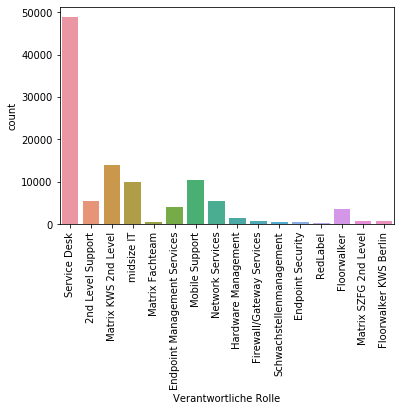

In [4]:
sns.countplot(data=df, x="Verantwortliche Rolle", orient="v")
plt.xticks(rotation=90)
plt.show()

## Text Processing with Spacy

In [5]:
nlp_en_md = spacy.load("en_core_web_md")
nlp_de_md = spacy.load("de_core_news_md")

In [6]:
df[df["Verantwortliche Rolle"]=="Service Desk"]["Zusammenfassung"].value_counts().head()

Abwesensheitsnachricht                 239
Out of Office                          235
Systemanmeldung nicht mehr möglich.    199
AD Konto gesperrt                      155
gesperrtes AD Konto                    132
Name: Zusammenfassung, dtype: int64

In [7]:
text = "gesperrt Konto Bitlocker Recovery Systemanmeldung Safenet nötig User"

In [8]:
doc_en_md = nlp_en_md(text)
doc_de_md = nlp_de_md(text)

def text_vector_df_from_model(doc):
    df = pd.DataFrame()
    for i, token in enumerate(doc):
        df.loc[i,"token"] = token.text
        df.loc[i,"has_vector"] = token.has_vector
        df.loc[i,"vector_norm"] = token.vector_norm
        df.loc[i,"is_oov"] = token.is_oov
    df = df.set_index(["token"])
    return df.T

print("German Model")
test_df_de= text_vector_df_from_model(doc_de_md)
display(test_df_de)   

print("English Model")
test_df_en= text_vector_df_from_model(doc_en_md)
display(test_df_en)

German Model


token,gesperrt,Konto,Bitlocker,Recovery,Systemanmeldung,Safenet,nötig,User
has_vector,True,False,False,True,False,False,True,True
vector_norm,5.96663,0,0,3.23261,0,0,5.14584,4.48309
is_oov,False,False,False,False,True,False,False,False


English Model


token,gesperrt,Konto,Bitlocker,Recovery,Systemanmeldung,Safenet,nötig,User
has_vector,True,True,True,True,False,False,True,True
vector_norm,7.78631,7.29042,7.59149,6.86714,0,0,7.65225,6.72374
is_oov,False,False,False,False,True,True,False,False


## Similarity

In [9]:
print(doc_en_md.vector_norm)
print(doc_de_md.vector_norm)
print(doc_en_md.similarity(doc_de_md))
print(doc_en_md[2].vector_norm)
print(doc_de_md[2].vector_norm)
print(doc_en_md[2].similarity(doc_de_md[2]))

2.9985301050480206
1.6154512922038762
1.0
7.591486
0.0
1.0


## Extract Word-Embeddings from Zusammenfassung